In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [51]:
x=pd.read_csv('credit.csv')
x = x.drop('CUST_ID', axis=1)

In [53]:

x.fillna(method='ffill', inplace=True)
print(x.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [59]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [61]:
x_normalized = normalize(x_scaled)
X_normalized = pd.DataFrame(x_normalized)

In [63]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(X_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['p1', 'p2']

In [65]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(x_principal)
labels = db_default.labels_

In [67]:
colors = {}
colors[0] = 'r'
colors[1] = 'g'
colors[2] = 'b'
colors[-1] = 'k'

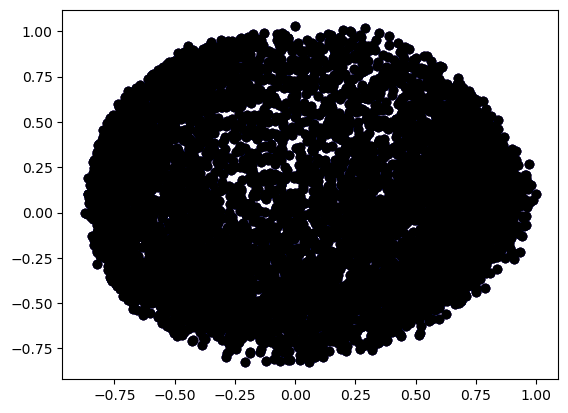

In [79]:
cvec = [colors[label] for label in labels]


r=plt.scatter(x_principal['p1'], x_principal['p2'], c='r')
g=plt.scatter(x_principal['p1'], x_principal['p2'], c='g')
b=plt.scatter(x_principal['p1'], x_principal['p2'], c='b')
k=plt.scatter(x_principal['p1'], x_principal['p2'], c='k')



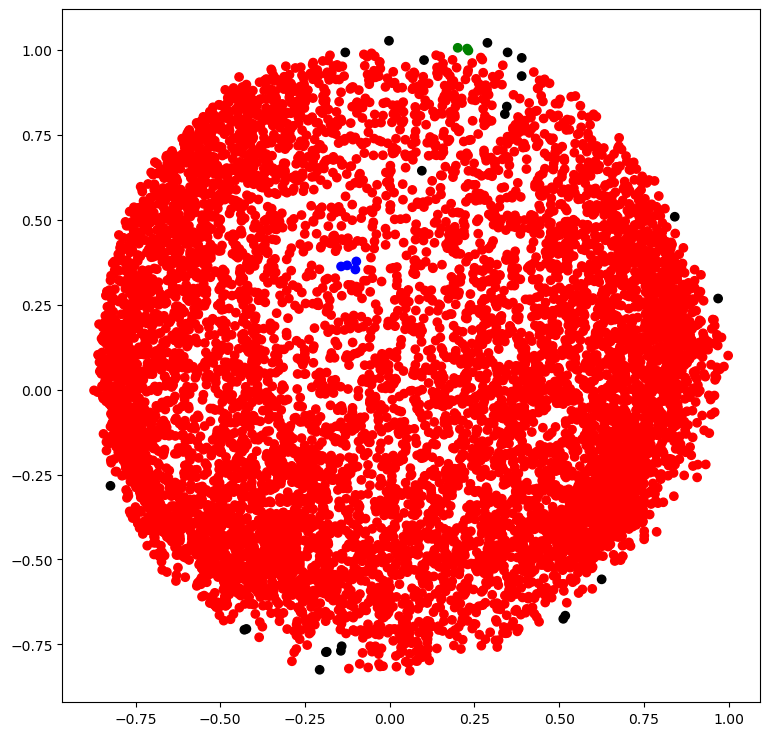

In [ ]:
plt.legend(r,g,b,k),('label 0','label 1','label 2',label -1')
    